# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [26]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [27]:
lat=[]
lng=[]
max_temp=[]
humidity=[]
clouds=[]
wind_speed=[]
country=[]
date=[]
city_name=[]

print("Beginning Data Retrieval")
print("------------------------------")
for i, city in enumerate(cities):
    url=f"http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID={weather_api_key}&q={city}&units=Imperial"
    response=requests.get(url)
    response_json=response.json()
    try:
        city_name.append(response_json["city"]["name"])
        lat.append(response_json["city"]["coord"]["lat"])
        lng.append(response_json["city"]["coord"]["lon"])
        country.append(response_json["city"]["country"])
        date.append(response_json["list"][0]["dt"])
        max_temp.append(response_json["list"][0]["main"]["temp_max"])
        humidity.append(response_json["list"][0]["main"]["humidity"])
        clouds.append(response_json["list"][0]["clouds"]["all"])
        wind_speed.append(response_json["list"][0]["wind"]["speed"])
        print(f"processing Record {i}|{city}")
    except (KeyError, IndexError):
        print(f"error processing, next {city}")
   

Beginning Data Retrieval
------------------------------
processing Record 0|mar del plata
processing Record 1|butaritari
processing Record 2|flinders
processing Record 3|qaanaaq
processing Record 4|port elizabeth
error processing, next labutta
error processing, next saleaula
processing Record 7|busselton
error processing, next taolanaro
processing Record 9|norman wells
processing Record 10|kaitangata
processing Record 11|chokurdakh
processing Record 12|cape town
processing Record 13|chippewa falls
processing Record 14|katsuura
processing Record 15|hermanus
processing Record 16|avarua
processing Record 17|severo-kurilsk
processing Record 18|kinablangan
error processing, next wahran
processing Record 20|torbay
processing Record 21|boralday
processing Record 22|mandalgovi
processing Record 23|rikitea
processing Record 24|ushuaia
processing Record 25|punta arenas
processing Record 26|jamestown
processing Record 27|brookings
processing Record 28|kedrovyy
processing Record 29|riyadh
processi

processing Record 260|rundu
processing Record 261|kutum
processing Record 262|bodden town
processing Record 263|bengkulu
processing Record 264|westport
processing Record 265|hasaki
processing Record 266|coihaique
processing Record 267|leningradskiy
processing Record 268|vila velha
processing Record 269|ippy
error processing, next kobojango
processing Record 271|orlik
processing Record 272|tongchuan
processing Record 273|waipawa
processing Record 274|brae
processing Record 275|kaduqli
processing Record 276|batavia
processing Record 277|brigantine
processing Record 278|toora-khem
processing Record 279|kununurra
processing Record 280|torres
processing Record 281|idlib
processing Record 282|nouadhibou
processing Record 283|teya
processing Record 284|mahon
processing Record 285|geraldton
processing Record 286|mazamet
processing Record 287|codrington
error processing, next dzhusaly
processing Record 289|san quintin
processing Record 290|mogzon
processing Record 291|sur
processing Record 292|

processing Record 521|palora
processing Record 522|maralal
processing Record 523|broome
processing Record 524|bhimunipatnam
processing Record 525|mondlo
processing Record 526|abnub
processing Record 527|kungurtug
processing Record 528|bukachacha
processing Record 529|coquimbo
processing Record 530|luderitz
processing Record 531|tarko-sale
processing Record 532|berlevag
processing Record 533|mareeba
error processing, next halalo
processing Record 535|praia da vitoria
processing Record 536|kavaratti
processing Record 537|grindavik
error processing, next palabuhanratu
processing Record 539|tamandare
processing Record 540|qax
error processing, next umm durman
processing Record 542|clyde river
processing Record 543|santa cruz de tenerife
processing Record 544|henties bay
processing Record 545|peniche
processing Record 546|sao joao do piaui
processing Record 547|strezhevoy
processing Record 548|altay
processing Record 549|amposta
processing Record 550|blackwater
processing Record 551|tancita

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
weather_dict= ({"City":city_name,
              "Country":country,
              "Date": date,
              "Lat":lat,
              "Lng": lng,
              "Max Temperature": max_temp,
              "Humidity":humidity,
              "Cloudiness":clouds,
              "Wind Speed":wind_speed})
weather_data=pd.DataFrame(weather_dict)
weather_data.head()
#export as csv
weather_data.to_csv(r'weather_data.csv', index = False)

In [37]:
weather_data.describe()   

,Date,Lat,Lng,Max Temperature,Humidity,Cloudiness,Wind Speed
count,5.570000e+02,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000
mean,1.605323e+09,19.071314,15.335269,56.962334,74.518851,47.768402,7.670987
std,0.000000e+00,33.313540,91.553628,24.984123,17.902768,36.161884,5.346581
min,1.605323e+09,-54.800000,-179.166700,-19.880000,7.000000,0.000000,0.180000
25%,1.605323e+09,-7.963100,-68.646000,39.630000,66.000000,13.000000,3.670000
50%,1.605323e+09,22.075200,20.040300,64.290000,79.000000,47.000000,6.530000
75%,1.605323e+09,46.833300,97.200000,76.150000,88.000000,86.000000,10.940000
max,1.605323e+09,78.218600,179.316700,105.530000,100.000000,100.000000,34.520000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [40]:
weather_data["Humidity"].max()

100

In [35]:
#  Get the indices of cities that have humidity over 100%.


In [36]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

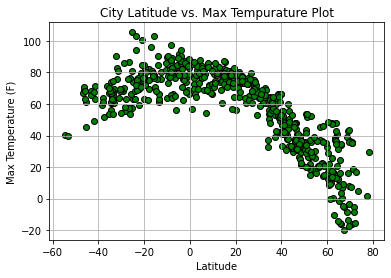

In [62]:
plt.scatter(weather_data["Lat"],weather_data["Max Temperature"], marker="o",facecolor='g', color='k')
plt.title("City Latitude vs. Max Tempurature Plot")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
#Save as png
plt.savefig('Graphs/Lat_MaxTemp.png')
#the code above is taking the latitude coordinates and correlating max temperatues from weather_data dataframe, and graphing them on the graph below. 


## Latitude vs. Humidity Plot

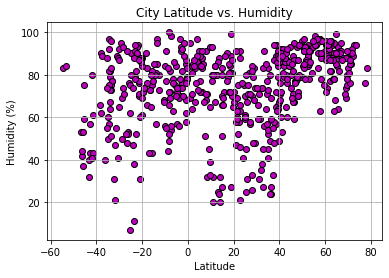

In [45]:
plt.scatter(weather_data["Lat"],weather_data["Humidity"], marker="o", color='k',facecolor='m')
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
#Save as png
plt.savefig('Graphs/Lat_Humidity.png')
#the code above is taking the latitude coordinates and correlating humidity percentage from weather_data dataframe, and graphing them on the graph below. 


## Latitude vs. Cloudiness Plot

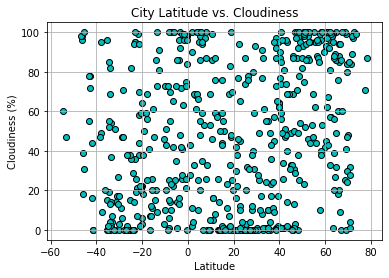

In [46]:
plt.scatter(weather_data["Lat"],weather_data["Cloudiness"], marker="o", color='k',facecolor='c')
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
#Save as png
plt.savefig('Graphs/Lat_Cloud.png')
#the code above is taking the latitude coordinates and correlating cloudiness percentages from weather_data dataframe, and graphing them on the graph below. 


## Latitude vs. Wind Speed Plot

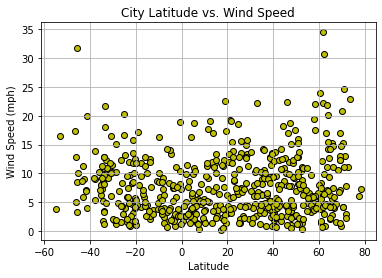

In [47]:
plt.scatter(weather_data["Lat"],weather_data["Wind Speed"], marker="o", color='k',facecolor='y')
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
#Save as png
plt.savefig('Graphs/Lat_Wind.png')
#the code above is taking the latitude coordinates and correlating wind speeds, in mph, from weather_data dataframe, and graphing them on the graph below. 


## Linear Regression

In [48]:
#Northern Hemisphere DF
weather_nhemp=weather_data[weather_data["Lat"]>0]
weather_nhemp

,City,Country,Date,Lat,Lng,Max Temperature,Humidity,Cloudiness,Wind Speed
1,Butaritari,KI,1605322800,3.0707,172.7902,81.68,67,69,8.70
3,Qaanaaq,GL,1605322800,77.4840,-69.3632,1.69,76,71,5.99
6,Norman Wells,CA,1605322800,65.2820,-126.8329,-1.84,84,87,4.21
8,Chokurdakh,RU,1605322800,70.6333,147.9167,-16.28,89,32,4.21
10,Chippewa Falls,US,1605322800,44.9369,-91.3929,29.57,74,49,10.98
...,...,...,...,...,...,...,...,...,...
549,Aksu,CN,1605322800,41.1231,80.2644,42.46,53,96,4.74
550,Yokadouma,CM,1605322800,3.5167,15.0500,69.22,76,61,1.30
552,Suntar,RU,1605322800,62.1444,117.6319,17.71,96,100,6.40
554,Mandan,US,1605322800,46.8267,-100.8896,31.69,76,29,9.84


In [51]:
#Southern Hemisphere DF
weather_shemp=weather_data[weather_data["Lat"]<0]
weather_shemp

,City,Country,Date,Lat,Lng,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Mar del Plata,AR,1605322800,-38.0023,-57.5575,63.75,90,49,13.85
2,Flinders,AU,1605322800,-34.5833,150.8552,74.25,57,0,7.29
4,Port Elizabeth,ZA,1605322800,-33.9180,25.5701,64.44,82,0,12.80
5,Busselton,AU,1605322800,-33.6500,115.3333,65.53,75,54,18.10
7,Kaitangata,NZ,1605322800,-46.2817,169.8464,69.12,42,96,4.99
...,...,...,...,...,...,...,...,...,...
540,Ilhabela,BR,1605322800,-23.7781,-45.3581,72.32,88,94,2.04
546,Oranjemund,NA,1605322800,-28.5500,16.4333,58.24,93,47,1.97
551,Marovoay,MG,1605322800,-16.1000,46.6333,77.79,80,12,4.99
553,Mananjary,MG,1605322800,-21.2167,48.3333,70.74,87,94,8.57


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7785339523142056


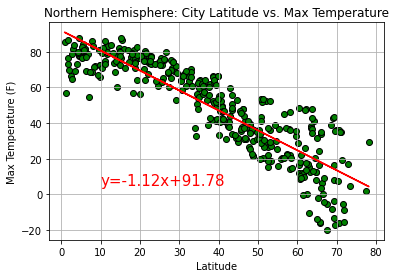

In [49]:
plt.scatter(weather_nhemp["Lat"],weather_nhemp["Max Temperature"], marker="o", color='k',facecolor='g')
plt.title("Northern Hemisphere: City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
#Line Regression
(slope, intercept, rvalue, pvalue, stderr)= linregress(weather_nhemp["Lat"],weather_nhemp["Max Temperature"])
lin_eq="y="+str(round(slope,2))+ "x+"+str(round(intercept,2))
regress_val=weather_nhemp["Lat"]*slope + intercept
plt.plot(weather_nhemp["Lat"],regress_val, "r-")
r_square=rvalue**2
print(f'The r-value is: {r_square}')
plt.annotate(lin_eq, (10,5), fontsize=15, color="r")
#Save as png
plt.savefig('Graphs/NHemp_Lat_MaxTemp.png')
#the code above is taking the latitude coordinates and correlating max temperatues from the northern hemisphere 
#weather_data dataframe, and graphing them on the graph below. 

#then, the code is creating a linear regression line from the y and values 


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7785339523142056


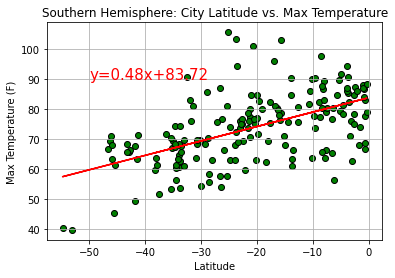

In [52]:
plt.scatter(weather_shemp["Lat"],weather_shemp["Max Temperature"], marker="o", color='k',facecolor='g')
plt.title("Southern Hemisphere: City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
#Linear Regression
(slope, intercept, rvalue, pvalue, stderr)= linregress(weather_shemp["Lat"],weather_shemp["Max Temperature"])
lin_eq="y="+str(round(slope,2))+ "x+"+str(round(intercept,2))
regress_val=weather_shemp["Lat"]*slope + intercept
plt.plot(weather_shemp["Lat"],regress_val, "r-")
print(f'The r-value is: {r_square}')
plt.annotate(lin_eq, (-50,90), fontsize=15, color="r")
#Save as png
plt.savefig('Graphs/SHemp_Lat_MaxTemp.png')
#the code above is taking the latitude coordinates and correlating max temperatues from the southern hemisphere 
#weather_data dataframe, and graphing them on the graph below.

#then, the code is creating a linear regression line from the y and values 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.7785339523142056


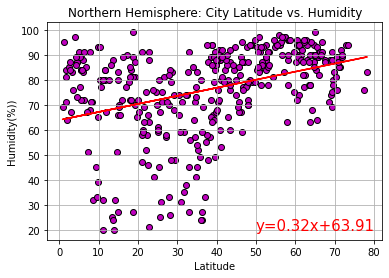

In [54]:
plt.scatter(weather_nhemp["Lat"],weather_nhemp["Humidity"], marker="o", color='k',facecolor='m')
plt.title("Northern Hemisphere: City Latitude vs. Humidity")
plt.ylabel("Humidity(%))")
plt.xlabel("Latitude")
plt.grid(True)
#linear regression
(slope, intercept, rvalue, pvalue, stderr)= linregress(weather_nhemp["Lat"],weather_nhemp["Humidity"])
lin_eq="y="+str(round(slope,2))+ "x+"+str(round(intercept,2))
regress_val=weather_nhemp["Lat"]*slope + intercept
plt.plot(weather_nhemp["Lat"],regress_val, "r-")
print(f'The r-value is: {r_square}')
plt.annotate(lin_eq, (50,20), fontsize=15, color="r")
#Save as png
plt.savefig('Graphs/NHemp_Lat_Humid.png')
#the code above is taking the latitude coordinates and correlating humidity percentages from the northern hemisphere 
#weather_data dataframe, and graphing them on the graph below.

#then, the code is creating a linear regression line from the y and values 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.7785339523142056


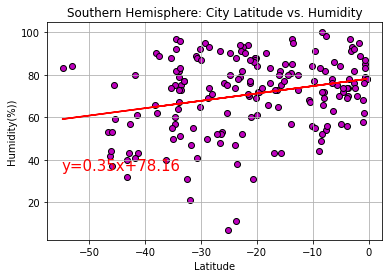

In [56]:
plt.scatter(weather_shemp["Lat"],weather_shemp["Humidity"], marker="o", color='k',facecolor='m')
plt.title("Southern Hemisphere: City Latitude vs. Humidity")
plt.ylabel("Humidity(%))")
plt.xlabel("Latitude")
plt.grid(True)
#linear regression
(slope, intercept, rvalue, pvalue, stderr)= linregress(weather_shemp["Lat"],weather_shemp["Humidity"])
lin_eq="y="+str(round(slope,2))+ "x+"+str(round(intercept,2))
regress_val=weather_shemp["Lat"]*slope + intercept
plt.plot(weather_shemp["Lat"],regress_val, "r-")
print(f'The r-value is: {r_square}')
plt.annotate(lin_eq, (-55,35), fontsize=15, color="r")
#Save as png
plt.savefig('Graphs/SHemp_Lat_Humid.png')
#the code above is taking the latitude coordinates and correlating humidity percentages from the southern hemisphere 
#weather_data dataframe, and graphing them on the graph below.

#then, the code is creating a linear regression line from the y and values 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.7785339523142056


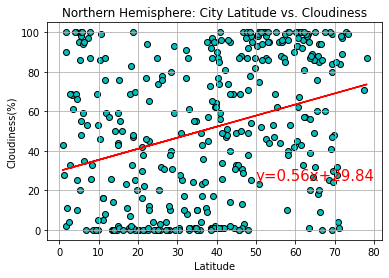

In [58]:
plt.scatter(weather_nhemp["Lat"],weather_nhemp["Cloudiness"], marker="o", color='k',facecolor='c')
plt.title("Northern Hemisphere: City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
#linear regression
(slope, intercept, rvalue, pvalue, stderr)= linregress(weather_nhemp["Lat"],weather_nhemp["Cloudiness"])
lin_eq="y="+str(round(slope,2))+ "x+"+str(round(intercept,2))
regress_val=weather_nhemp["Lat"]*slope + intercept
plt.plot(weather_nhemp["Lat"],regress_val, "r-")
print(f'The r-value is: {r_square}')
plt.annotate(lin_eq, (50,25), fontsize=15, color="r")
#Save as png
plt.savefig('Graphs/NHemp_Lat_Cloud.png')
#the code above is taking the latitude coordinates and correlating cloudiness percentages from the northern hemisphere 
#weather_data dataframe, and graphing them on the graph below.

#then, the code is creating a linear regression line from the y and values 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.7785339523142056


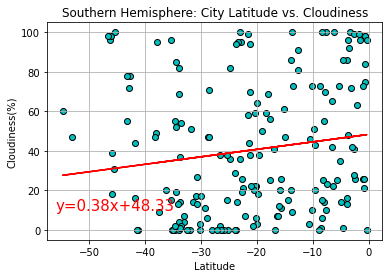

In [59]:
plt.scatter(weather_shemp["Lat"],weather_shemp["Cloudiness"], marker="o", color='k',facecolor='c')
plt.title("Southern Hemisphere: City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
#linear regression
(slope, intercept, rvalue, pvalue, stderr)= linregress(weather_shemp["Lat"],weather_shemp["Cloudiness"])
lin_eq="y="+str(round(slope,2))+ "x+"+str(round(intercept,2))
regress_val=weather_shemp["Lat"]*slope + intercept
plt.plot(weather_shemp["Lat"],regress_val, "r-")
print(f'The r-value is: {r_square}')
plt.annotate(lin_eq, (-56,10), fontsize=15, color="r")
#Save as png
plt.savefig('Graphs/SHemp_Lat_Cloud.png')
#the code above is taking the latitude coordinates and correlating cloudiness percentages from the southern hemisphere 
#weather_data dataframe, and graphing them on the graph below.

#then, the code is creating a linear regression line from the y and values 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.7785339523142056


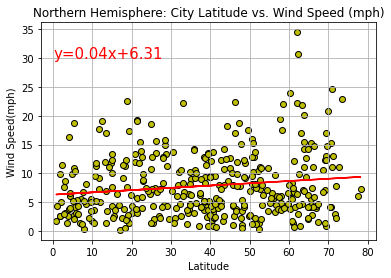

In [60]:
plt.scatter(weather_nhemp["Lat"],weather_nhemp["Wind Speed"], marker="o", color='k',facecolor='y')
plt.title("Northern Hemisphere: City Latitude vs. Wind Speed (mph)")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)
#linear regression
(slope, intercept, rvalue, pvalue, stderr)= linregress(weather_nhemp["Lat"],weather_nhemp["Wind Speed"])
lin_eq="y="+str(round(slope,2))+ "x+"+str(round(intercept,2))
regress_val=weather_nhemp["Lat"]*slope + intercept
plt.plot(weather_nhemp["Lat"],regress_val, "r-")
print(f'The r-value is: {r_square}')
plt.annotate(lin_eq, (0,30), fontsize=15, color="r")
#Save as png
plt.savefig('Graphs/NHemp_Lat_Wind.png')
#the code above is taking the latitude coordinates and correlating wind speed, in mph, from the northern hemisphere 
#weather_data dataframe, and graphing them on the graph below.

#then, the code is creating a linear regression line from the y and values 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.7785339523142056


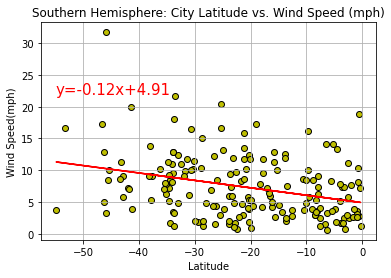

In [61]:
plt.scatter(weather_shemp["Lat"],weather_shemp["Wind Speed"], marker="o", color='k',facecolor='y')
plt.title("Southern Hemisphere: City Latitude vs. Wind Speed (mph)")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)
#linear regression
(slope, intercept, rvalue, pvalue, stderr)= linregress(weather_shemp["Lat"],weather_shemp["Wind Speed"])
lin_eq="y="+str(round(slope,2))+ "x+"+str(round(intercept,2))
regress_val=weather_shemp["Lat"]*slope + intercept
plt.plot(weather_shemp["Lat"],regress_val, "r-")
print(f'The r-value is: {r_square}')
plt.annotate(lin_eq, (-55,22), fontsize=15, color="r")
#Save as png
plt.savefig('Graphs/SHemp_Lat_Wind.png')
#the code above is taking the latitude coordinates and correlating wind speeds, in mph, from the southern hemisphere 
#weather_data dataframe, and graphing them on the graph below.
#then, the code is creating a linear regression line from the y and values 